In [1]:
# Make random clusters 

from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

blob_centers = np.array([[0.2, 2.3], [-1.5, 2.3], [-2.8,1.8], [-2.8, 2.8], [-2.8,1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples = 2000, centers = blob_centers, cluster_std = blob_std, random_state = 7)

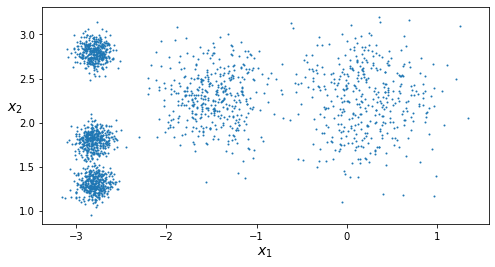

In [2]:
# Plotting the blobs

def plot_clusters(X, y = None):
    plt.scatter(X[:, 0], X[:,1], s = 1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [3]:
#K-means

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5)
y_pred = kmeans.fit_predict(X)

print(y_pred)
print(kmeans.cluster_centers_)

#Predicting new instances
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
print(kmeans.predict(X_new))


#The distances from each centroid
print(kmeans.transform(X))

[4 1 0 ... 3 0 1]
[[ 0.20876306  2.25551336]
 [-2.80389616  1.80117999]
 [-1.46679593  2.28585348]
 [-2.79290307  2.79641063]
 [-2.80037642  1.30082566]]
[0 0 3 3]
[[3.04611916 0.46779778 1.54944305 1.45402521 0.11146795]
 [3.11541584 0.07122059 1.48612753 0.99002955 0.51431557]
 [1.32016676 3.81713488 2.67154781 4.09069201 3.76340605]
 ...
 [3.04886464 0.92830156 1.40795651 0.06769209 1.42865797]
 [0.14895409 3.10300136 1.71125    3.05913478 3.23385668]
 [2.8625311  0.22700281 1.21678483 0.85434589 0.67518173]]


In [4]:
# Inertia and Score

print(kmeans.inertia_)
print(kmeans.score(X))

211.5985372581684
-211.59853725816856


In [5]:
#Mini Batch K-means

from sklearn.cluster import MiniBatchKMeans

mb_kmeans = MiniBatchKMeans(n_clusters = 5)
mb_kmeans.fit(X)
mb_kmeans.inertia_

211.88691188787544

(1.8, 8.5, 0.55, 0.7)

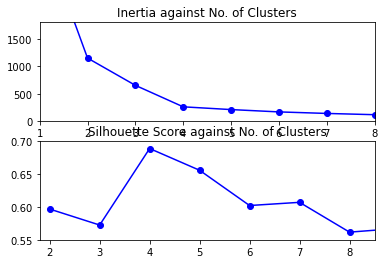

In [6]:
# Finding optimal number of clusters
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

#Plotting Inertia against number of clusters

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

plt.subplot(211)
plt.title("Inertia against No. of Clusters")
plt.plot(range(1, 10), inertias, "bo-")
plt.axis([1,8,0,1800])

plt.subplot(212)
plt.title("Silhouette Score against No. of Clusters")
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.axis([1.8, 8.5, 0.55, 0.7])

In [7]:
# Colour segmentation

from matplotlib.image import imread

image = imread("ladybug.png")
image.shape

(533, 800, 3)

In [13]:
X = image.reshape(-1,3)

segmented_imgs = []
n_colors = [10, 8, 6, 4, 2]

for n_clusters in n_colors:
    kmeans = KMeans(n_clusters = n_clusters).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

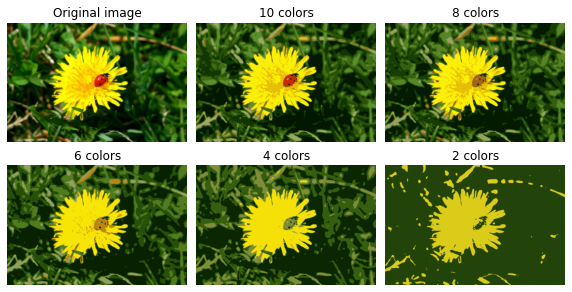

In [14]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')
    
plt.show()

In [15]:
# Clustering for Preprocessing

from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)


In [17]:
#Training a logistic regression model then seeing the score

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state = 42, max_iter = 5000)
log_reg.fit(X_train, y_train)

log_reg.score(X_test, y_test)

0.9622222222222222

In [23]:
#Clean it up using clustering

from sklearn.pipeline import Pipeline


pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.9733333333333334

In [25]:
#Finding optimal number of clusters for cleanup

from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(75, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2, n_jobs = -1)
grid_clf.fit(X_train, y_train)

print(grid_clf.best_params_)
print(grid_clf.score(X_test, y_test))

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  4.2min finished


{'kmeans__n_clusters': 77}
0.9733333333333334


In [26]:
# Clustering for Semi-Supervised learning

log_reg = LogisticRegression()
log_reg.fit(X_train[:50], y_train[:50]) #Sample of 50 instances

log_reg.score(X_test, y_test)

c:\users\abhir\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8133333333333334

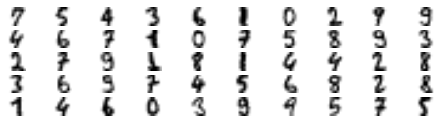

In [27]:
#Clustering to find representations of a cluster
kmeans = KMeans(n_clusters = 50)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(5, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

In [29]:
# Manually label representative labels

y_representative_digits = np.array([7,5,4,3,6,1,0,2,9,9,4,6,7,1,0,7,5,8,9,3,2,7,9,1,8,1,4,4,2,8,3,6,9,7,4,5,6,8,2,8,1,4,6,0,3,9,9,5,7,5])

log_reg = LogisticRegression()
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

c:\users\abhir\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9155555555555556

In [31]:
#Propogate labels to all other instances

y_train_propagated = np.empty(len(X_train), dtype = np.int32)
for i in range(50):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]
    
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

c:\users\abhir\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9377777777777778

In [34]:
#Partially propagate labels (E.g first 20% closest to a centroid)

percentile_closest = 20
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(50):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

log_reg = LogisticRegression()
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

c:\users\abhir\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9311111111111111

In [38]:
print("Partially propagated: ",np.mean(y_train_partially_propagated == y_train[partially_propagated]))

#Partially propagated labels are actually quite accurate

print("Fully propagated: ", np.mean(y_train_propagated == y_train))

Partially propagated:  0.9828178694158075
Fully propagated:  0.9458054936896808


In [40]:
#DBSCAN

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples = 1000, noise = 0.05)
dbscan = DBSCAN(eps = 0.2, min_samples = 5)
dbscan.fit(X)

print("Labels: ", dbscan.labels_)
print("Number of core samples: ", len(dbscan.core_sample_indices_))
print("Core sample indices: ", dbscan.core_sample_indices_)
print("Core samples: ", dbscan.components_)

Labels:  [0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1
 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1
 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1
 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1
 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1
 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0
 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0
 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0
 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1
 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1
 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0
 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1
 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1
 1 0 0 0 1 0 0 1

In [42]:
#Predicting a new instance

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
print(knn.predict(X_new))

print(knn.predict_proba(X_new))

#Marking anomalies based on distances
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

[1 0 1 0]
[[0.14 0.86]
 [1.   0.  ]
 [0.22 0.78]
 [1.   0.  ]]


array([-1,  0,  1, -1], dtype=int64)